* Name: Taegeon Yu
* Course: HDS-5230-07
* Title: Week5_Assignment

### Q1 & Q2

* Obtained a zip file and extracting the csv file.

In [2]:
import zipfile

In [3]:
# extracting the csv file from the zip file
with zipfile.ZipFile('/content/timeseries.csv.zip', 'r') as z:
      z.extract('timeseries.csv', '/content/timeseries.csv')

* The csv file is successfully extracted.

In [4]:
# import necessary libraries for assignment
import dask.dataframe as dd
import pandas as pd
import numpy as np

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [5]:
# read and copy the dataset
time = pd.read_csv('/content/timeseries.csv/timeseries.csv', dtype={'name':str,'level':str,'city':object,'county':str,'state':str,'country':str,'population':np.float64,'lat':float,'long':float,'url':str,'aggregate':object,'tz':str,'cases':np.float64,'deaths':np.float64,'recovered':np.float64,'active':np.float64,'tested':np.float64,'hospitalized':np.float64,'hospitalized_current':np.float64,'discharged':np.float64,'icu':np.float64,'icu_current':np.float64,'growthFactor':np.float64,'date':object})
df = time.copy()

In [6]:
# check the states to get rid of the non-state locations
a = time.query('country == "United States" and level == "state"')
a['state'].unique()

array(['Virginia', 'Washington', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'Washington, D.C.', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'West Virginia',
       'Wisconsin', 'Wyoming', 'Guam', 'Puerto Rico', 'American Samoa',
       'Northern Mariana Islands', 'United States Virgin Islands'],
      dtype=object)

In [7]:
# get rid of the non-states to ensure only 50 US states are presented
non_states = [
    "Washington, D.C.", "Guam", "Puerto Rico", "American Samoa",
    "Northern Mariana Islands", "United States Virgin Islands"
]

df = df[~df['state'].isin(non_states)]

In [8]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397495 entries, 0 to 397881
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   name                  397495 non-null  object 
 1   level                 397495 non-null  object 
 2   city                  1215 non-null    object 
 3   county                305257 non-null  object 
 4   state                 374118 non-null  object 
 5   country               397495 non-null  object 
 6   population            385465 non-null  float64
 7   lat                   385985 non-null  float64
 8   long                  385985 non-null  float64
 9   url                   397495 non-null  object 
 10  aggregate             350814 non-null  object 
 11  tz                    384959 non-null  object 
 12  cases                 392814 non-null  float64
 13  deaths                186806 non-null  float64
 14  recovered             54242 non-null   float64
 15  activ

In [9]:
# check dataset shape
df.shape

(397495, 24)

In [10]:
# check 10 samples
df.sample(n = 10, random_state = 42)

,name,level,city,county,state,country,population,lat,long,url,...,recovered,active,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,growthFactor,date
9058,"Rogatec, Slovenia",state,NaN,NaN,Rogatec,Slovenia,3094.0,46.2420,15.7385,https://raw.githubusercontent.com/slo-covid-19...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2020-04-21
116192,"Putnam County, Indiana, United States",county,NaN,Putnam County,Indiana,United States,37576.0,39.6685,-86.8285,https://opendata.arcgis.com/datasets/d14de7e28...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,2020-06-19
230701,"Bowman County, North Dakota, United States",county,NaN,Bowman County,North Dakota,United States,3024.0,46.1130,-103.5210,https://raw.githubusercontent.com/nytimes/covi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2020-06-07
216258,"Livingston County, New York, United States",county,NaN,Livingston County,New York,United States,62914.0,42.7295,-77.7740,https://raw.githubusercontent.com/nytimes/covi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2020-05-18
337949,Cameroon,country,NaN,NaN,NaN,Cameroon,24053727.0,7.3675,12.3440,https://github.com/CSSEGISandData/COVID-19,...,5.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,1.53,2020-03-29
150148,"Jackson Parish, Louisiana, United States",county,NaN,Jackson Parish,Louisiana,United States,15744.0,32.3210,-92.5670,https://raw.githubusercontent.com/nytimes/covi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01,2020-07-02
206619,"Lyon County, Nevada, United States",county,NaN,Lyon County,Nevada,United States,57510.0,39.0770,-119.2335,https://raw.githubusercontent.com/nytimes/covi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02,2020-06-13
306583,"Utah County, Utah, United States",county,NaN,Utah County,Utah,United States,636235.0,40.1770,-111.5355,https://coronavirus-dashboard.utah.gov/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2020-03-17
93590,"Troup County, Georgia, United States",county,NaN,Troup County,Georgia,United States,69922.0,33.0460,-85.0495,https://ga-covid19.ondemand.sas.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.09,2020-06-05
217205,"Onondaga County, New York, United States",county,NaN,Onondaga County,New York,United States,460528.0,43.0215,-76.1970,https://raw.githubusercontent.com/nytimes/covi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01,2020-06-17


### Q2

In [11]:
# load to dask dataframe with 10 partitions
df = dd.from_pandas(df, npartitions = 10)
df

,name,level,city,county,state,country,population,lat,long,url,aggregate,tz,cases,deaths,recovered,active,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,growthFactor,date
npartitions=10,,,,,,,,,,,,,,,,,,,,,,,,
0,string,string,string,string,string,string,float64,float64,float64,string,string,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,string
39750,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357867,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397881,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


* Loading large csv file into dask dataframe clearly has benefits in memory efficiency.
* We will use ten partitions for parallelized computation, leading to fast execution and memory efficiency.

## **Q3**

### 3. 1

In [12]:
# subset the dataframe with states in the US
df_filtered = df.query("country == 'United States' and level == 'state'")

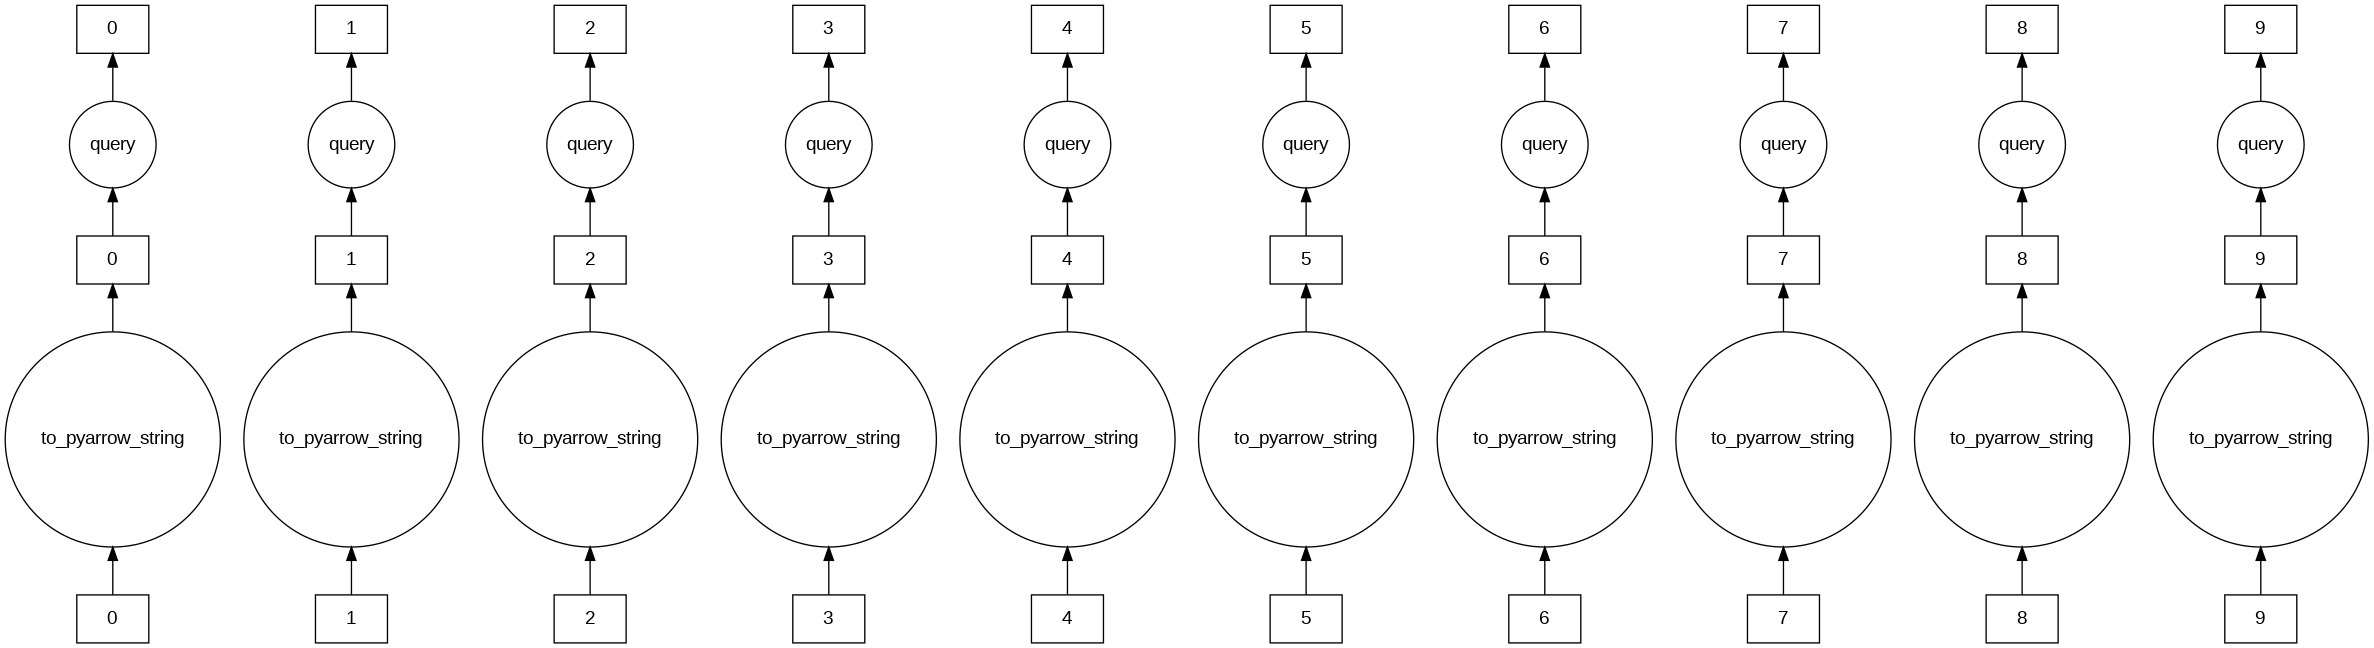

In [13]:
# visualize the computation graph
df_filtered.visualize()

* The simple filtering operation may have little benefits from dask, but lazy evaulation may have some benefits.

### 3. 2

In [14]:
# check the dtype of the date
df_filtered['date'].dtype

string[pyarrow]

In [15]:
# convert the dtype into datetime
df_filtered['date'] = dd.to_datetime(df_filtered['date'])

In [16]:
# filter the date from 2020-01-01 to 2021-02-28 (14 months)
start = '2020-01-01'
end = '2021-02-28'

df_date_filtered = df_filtered[(df_filtered['date'] >= start) & (df_filtered['date'] <= end)]

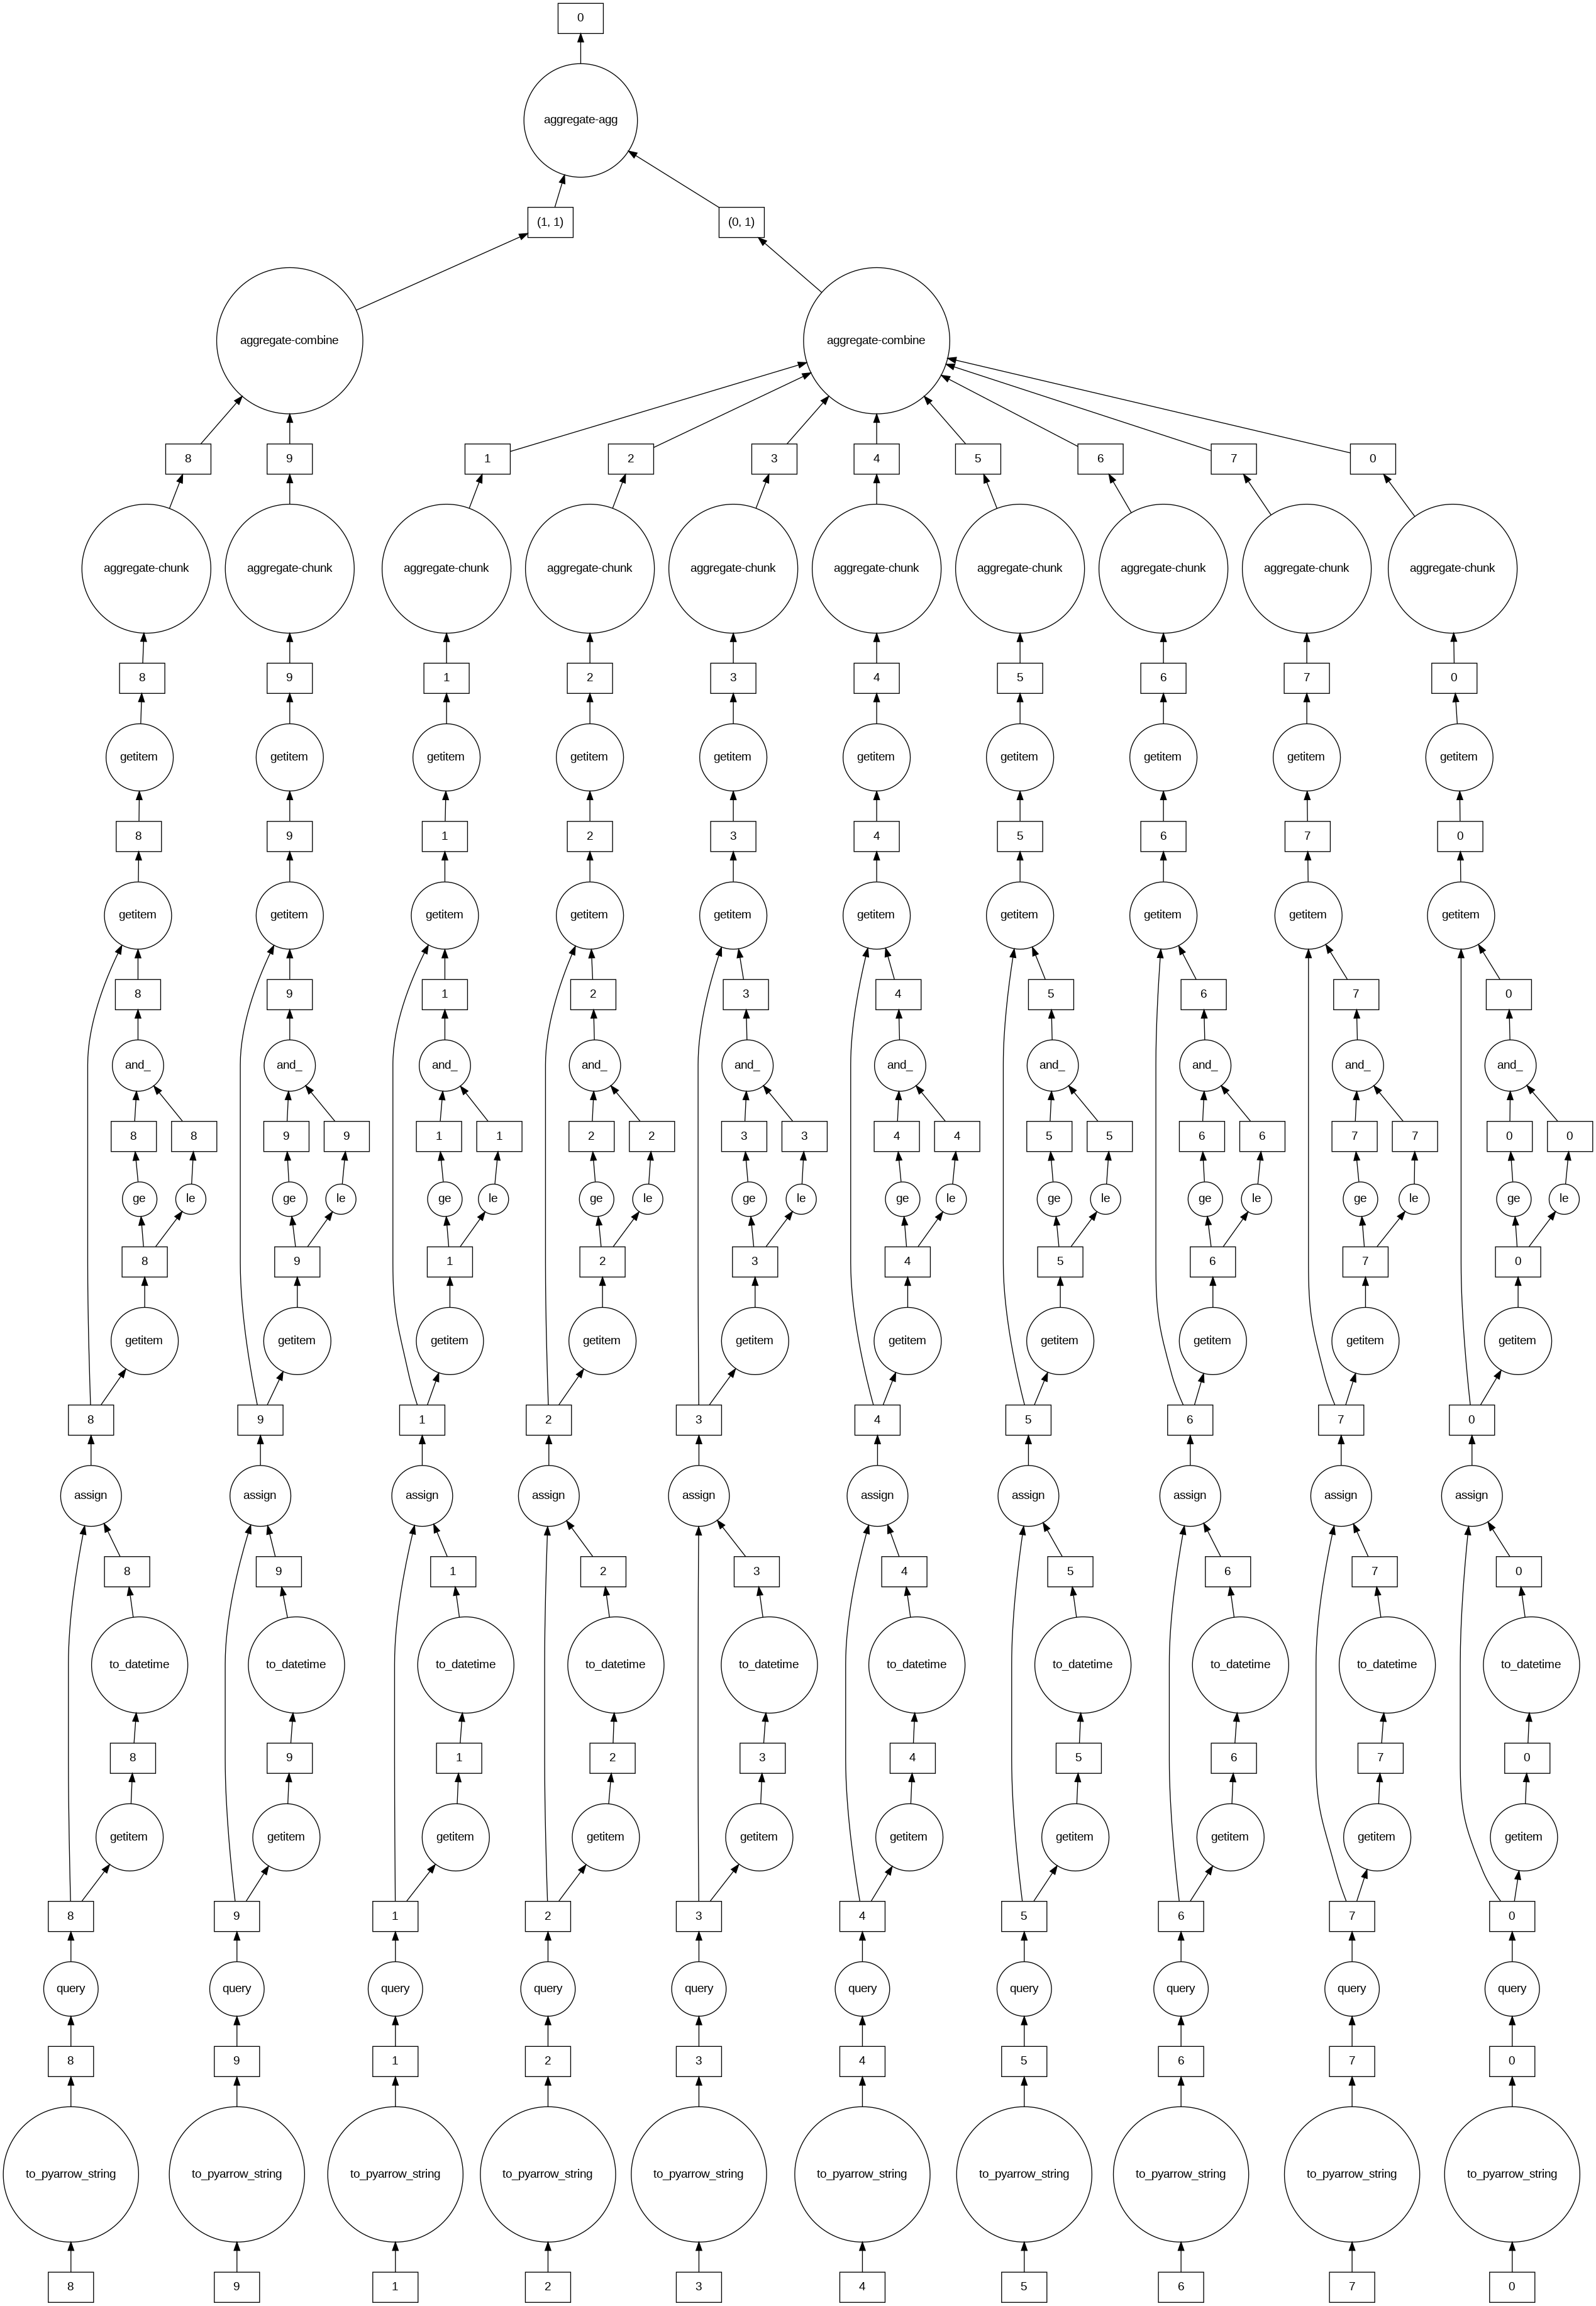

In [17]:
# visualize computation graph
df_date_filtered.groupby('state').agg({
    'deaths': 'sum',
    'population': 'mean'
}).visualize()

* Groupby operations are extensive computation technique and can be efficiently done through partitions

In [18]:
# subset data to get the values we need to calculate mortality rates per state
mortality_per_state = df_date_filtered.groupby('state').agg({
    'deaths': 'sum',        # total deaths per state
    'population': 'mean'    # average population per state
}).compute() # compute the dask df to get results

In [19]:
# calculate mortality rate per state and reset the index in descending order
mortality_per_state['per_capita_mortality'] = mortality_per_state['deaths'] / mortality_per_state['population']
mortality_per_state = mortality_per_state.sort_values(by='per_capita_mortality', ascending=False)

In [20]:
mortality_per_state

,deaths,population,per_capita_mortality
state,,,
New Jersey,861317.0,8882190.0,0.096971
Connecticut,277777.0,3565287.0,0.077912
Massachusetts,482980.0,6892503.0,0.070073
New York,1358824.0,19453561.0,0.069850
Louisiana,213399.0,4648794.0,0.045904
Rhode Island,46435.0,1059361.0,0.043833
Michigan,419841.0,9986857.0,0.042039
Illinois,382919.0,12671821.0,0.030218
Pennsylvania,378963.0,12801989.0,0.029602


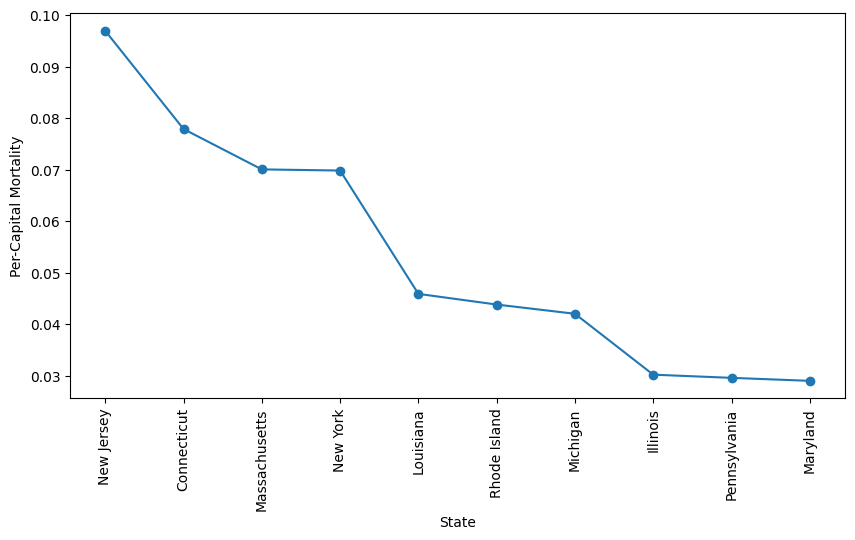

In [21]:
# plot ten states with the highest mortality rate
import matplotlib.pyplot as plt

top_10_states = mortality_per_state[:10]

plt.figure(figsize = (10, 5))
plt.plot(top_10_states.index, top_10_states['per_capita_mortality'], marker='o')
plt.xlabel('State')
plt.ylabel('Per-Capital Mortality')
plt.xticks(rotation = 90)
plt.show()

* New Jersey, Connecticut, Massachusetts, and New York are states with highest mortality rate with over 7 or close to 7 percent.

### 3.3

In [22]:
# create new column year_month including the year and month only
df_date_filtered['year_month'] = df_date_filtered['date'].dt.to_period('M')

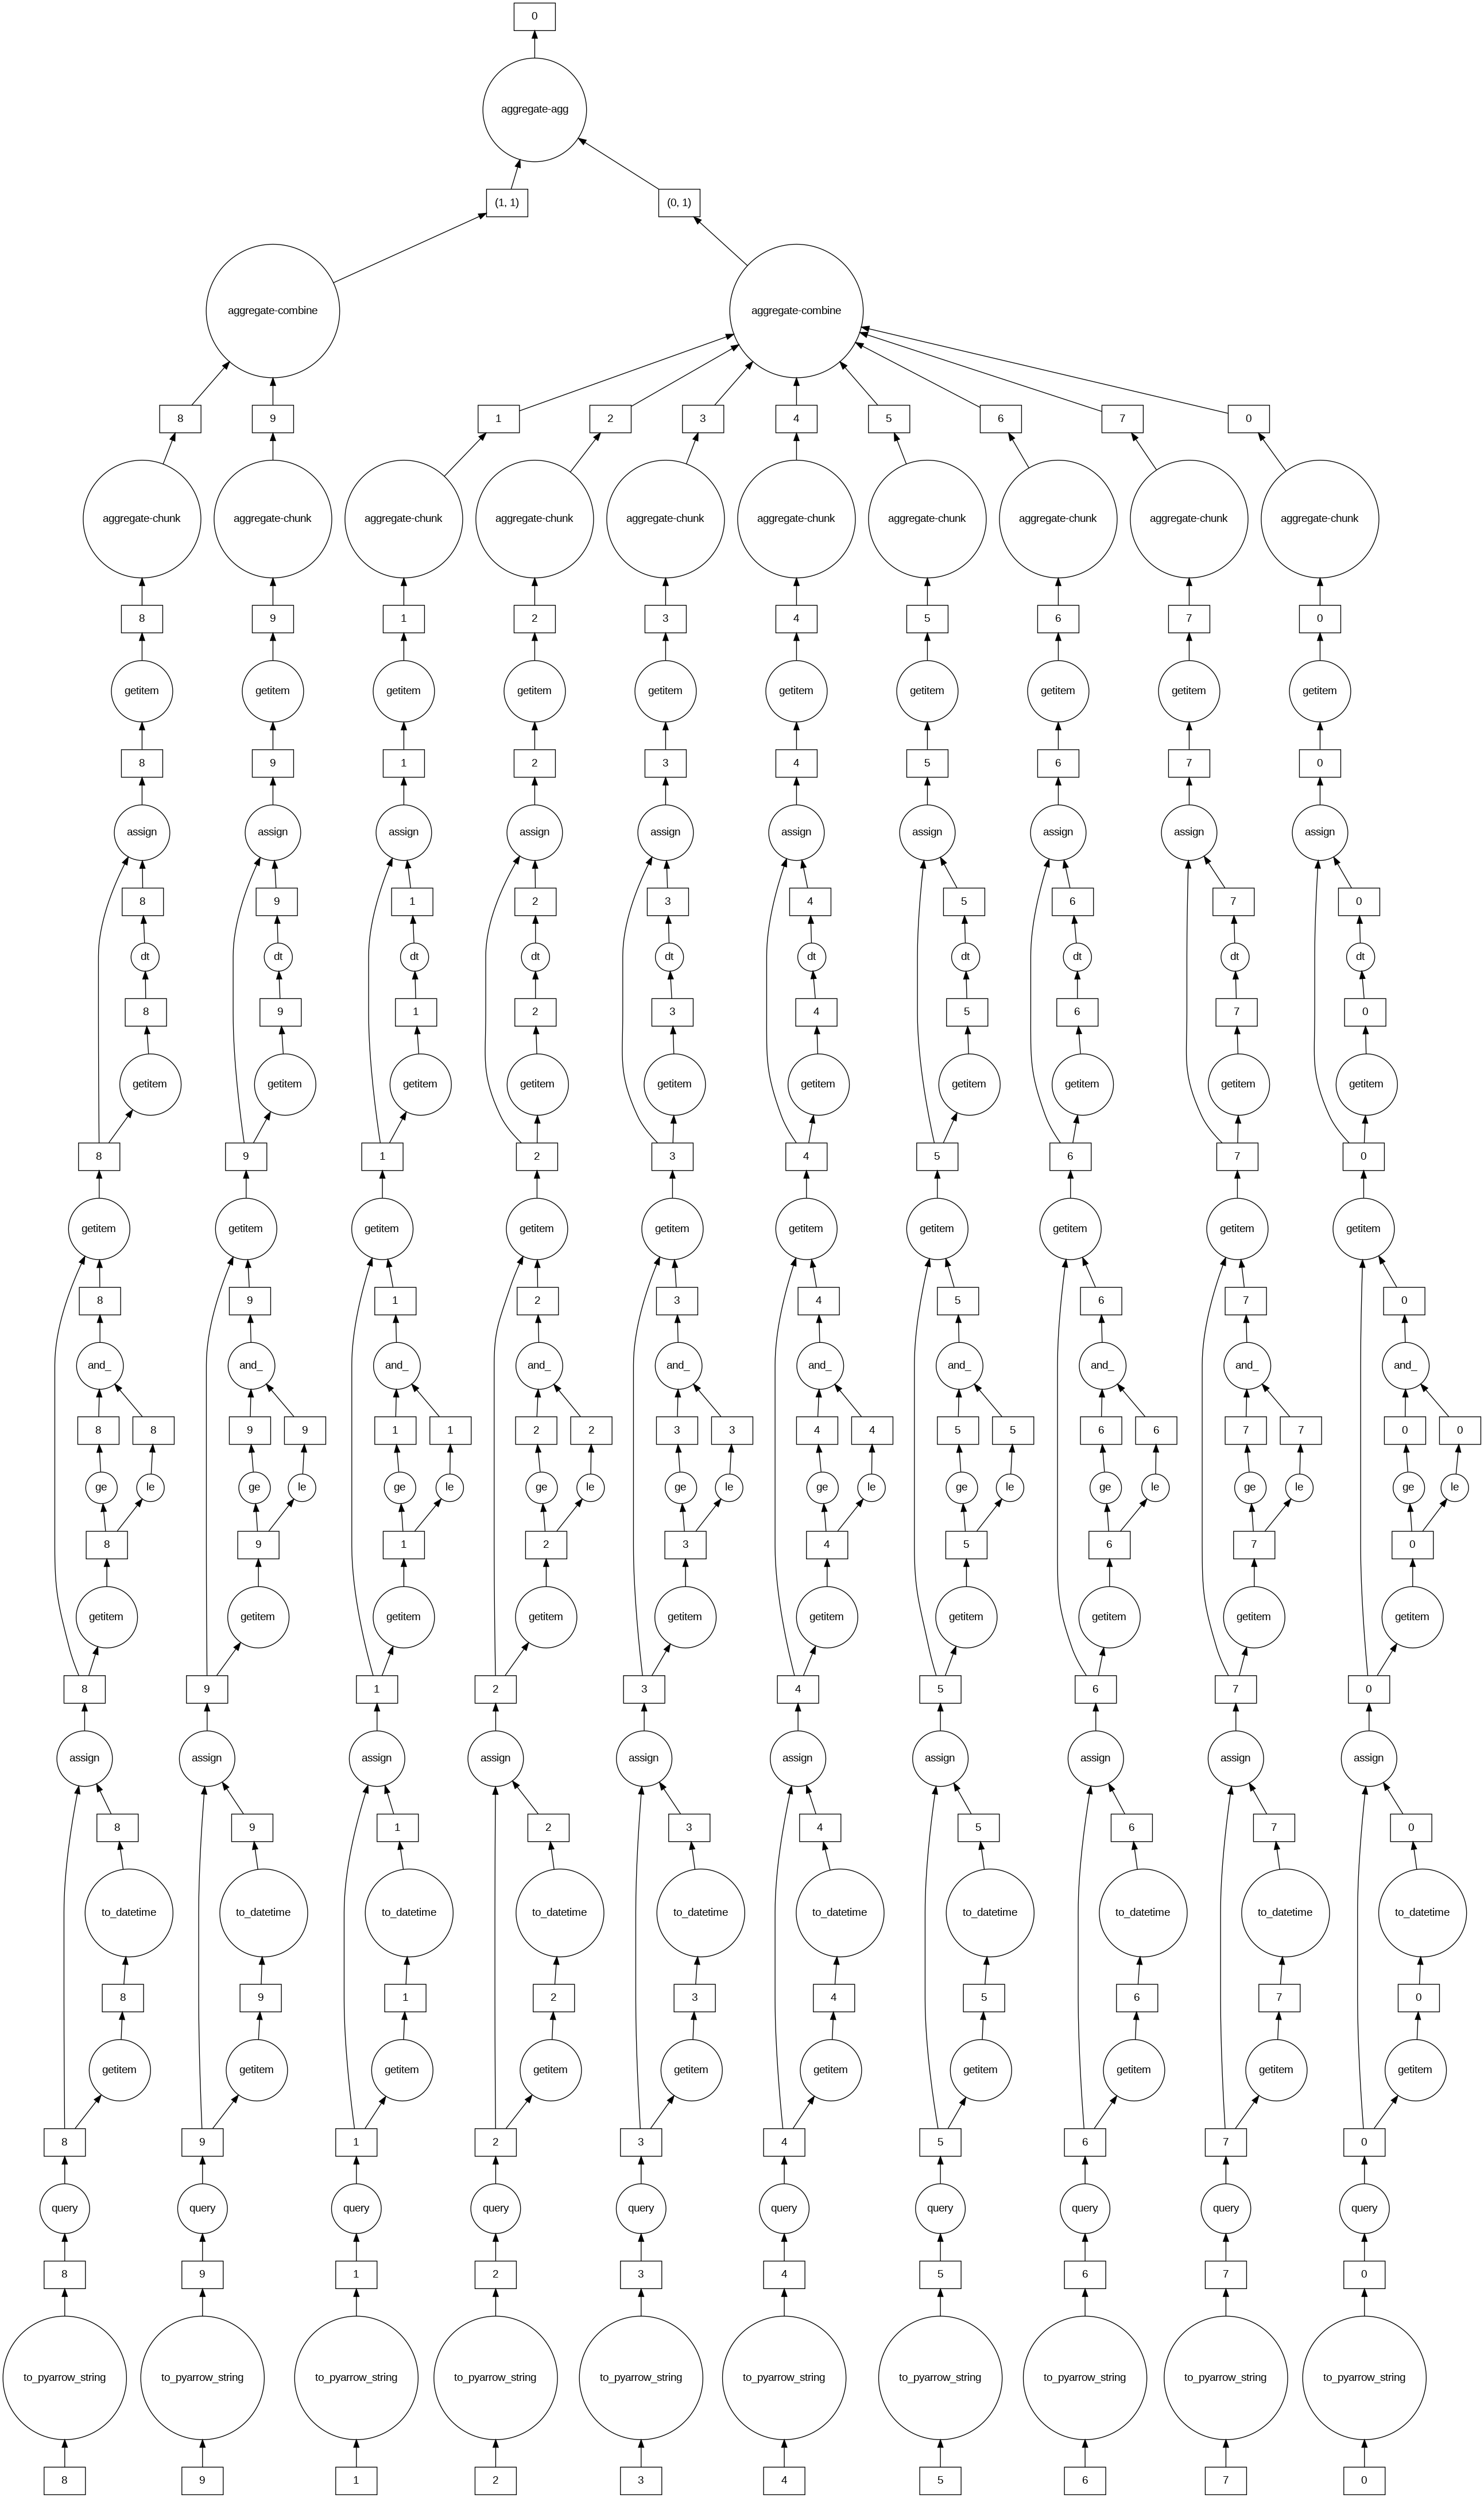

In [23]:
# visualize computation graph
df_date_filtered.groupby(['state', 'year_month']).agg({
    'deaths': 'sum',
    'cases': 'sum'
}).visualize()

* Numerous aggregation tasks and complex groupings may be effective by partition-ran operations

In [24]:
# subset data to get the values we need to calculate cfr rates per state
month_stat = df_date_filtered.groupby(['state', 'year_month']).agg({
    'deaths': 'sum', # total deaths per state
    'cases': 'sum'   # total confirmed cases per state
}).compute()

In [25]:
month_stat

deaths      cases
state    year_month                    
Virginia 2020-03        87.0     6183.0
         2020-04      6649.0   221519.0
         2020-05     30682.0   925318.0
         2020-06     47031.0  1642883.0
         2020-07      9149.0   322188.0
...                      ...        ...
Wyoming  2020-03         0.0      770.0
         2020-04        81.0     9302.0
         2020-05       296.0    22614.0
         2020-06       555.0    33714.0
         2020-07       100.0     7886.0

[264 rows x 2 columns]

In [26]:
# calculate the cfr rates using one of the formula from the webpage
month_stat['CFR'] = (month_stat['deaths'] / month_stat['cases']) * 100
# drop the columns that are not needed
month_stat.drop(['deaths', 'cases'], axis = 1, inplace = True)

In [27]:
# reshape the dataset for better display
month_stat.unstack(level=1)

CFR                                                  \
year_month       2020-03   2020-04   2020-05   2020-06   2020-07 2020-01   
state                                                                      
Virginia        1.407084  3.001548  3.315833  2.862711  2.839646     NaN   
Washington      4.909331  5.132259  5.398038  4.397223  3.942265     0.0   
Alabama         0.532357  2.982860  3.896724  2.961696  2.395633     NaN   
Alaska          0.000000  2.679510  2.409147  1.332153  1.420455     NaN   
Arizona         0.000000  2.973322  3.907743  0.423027  1.947077     0.0   
Arkansas        0.923077  1.873642  2.101066  1.513389  1.254541     NaN   
California      2.016785  3.479974  3.983350  3.178666  2.543001     0.0   
Colorado        1.829409  4.369445  5.344695  5.419421  5.062409     NaN   
Connecticut     1.818444  6.425654  8.987971  9.344211  9.279296     NaN   
Delaware        1.334107  2.726529  3.656999  4.194072  4.309472     NaN   
Florida         0.853401  2.905490  4.274810  3.405749  2.038668     NaN   
Georgia         2.131739  3.873315  4.318048  4.294190  3.157505     NaN   
Hawaii          0.072569  0.000000  0.524799  1.923594  0.000000     NaN   
Idaho           1.449275  2.264567  3.026796  2.255252  1.381414     NaN   
Illinois        1.288218  4.039821  4.423892  4.759660  4.801969     0.0   
Indiana         2.396579  4.775795  5.564376  5.852435  5.314359     NaN   
Iowa            0.866426  2.328418  2.434389  2.682388  2.358951     NaN   
Kansas          0.991034  4.034270  2.235169  2.101952  1.768784     NaN   
Kentucky        2.226077  5.074331  4.666360  4.043299  3.706810     NaN   
Louisiana       3.922247  5.192111  7.106389  6.174613  5.210450     NaN   
Maine           0.524559  3.768103  4.180329  3.583163  3.159398     NaN   
Maryland        0.261008  4.024040  4.970453  4.680862  4.682013     NaN   
Massachusetts   0.694813  4.393217  6.613963  7.247907  7.431181     NaN   
Michigan        2.501800  7.307812  9.555297  9.080366  8.616949     NaN   
Minnesota       0.000000  5.052070  4.655972  4.207882  3.999253     NaN   
Mississippi     1.504930  3.373854  4.593225  4.455260  3.730257     NaN   
Missouri        1.191596  3.162209  5.348481  5.683426  4.503435     NaN   
Montana         0.000000  1.783664  3.443073  2.937162  2.015697     NaN   
Nebraska        0.000000  1.422212  1.257632  1.359915  1.443365     NaN   
Nevada          2.053849  4.065200  4.985858  3.831172  2.538027     NaN   
New Hampshire   0.268817  2.724968  4.626942  5.988298  6.425137     NaN   
New Jersey      0.401755  4.118111  6.917097  7.770987  8.772718     NaN   
New Mexico      0.705290  2.949950  4.327889  4.408189  4.020261     NaN   
New York        0.466390  5.272954  6.273529  5.562415  6.288581     NaN   
North Carolina  0.331518  2.722004  3.471878  2.512181  1.987509     NaN   
North Dakota    0.253807  1.686306  2.278753  2.391584  2.275539     NaN   
Ohio            1.529684  4.451486  5.865583  6.024960  5.275936     NaN   
Oklahoma        2.834800  5.439762  5.530807  3.907142  2.627210     NaN   
Oregon          2.662914  3.611497  3.838384  2.944807  2.210617     NaN   
Pennsylvania    1.083094  3.294423  6.877499  7.531998  7.581787     NaN   
Rhode Island    0.152362  2.445591  4.035380  5.439538  5.656682     NaN   
South Carolina  1.964286  2.864551  4.343193  2.894657  1.917207     NaN   
South Dakota    0.564972  0.476176  1.074862  1.282311  1.382661     NaN   
Tennessee       0.033970  1.924598  1.653682  1.514791  1.296971     NaN   
Texas           1.185013  2.401321  2.736304  2.009999  1.402362     NaN   
Utah            0.354809  0.878581  1.105797  0.885723  0.749920     NaN   
Vermont         3.419283  4.230239  5.698821  4.975616  4.545455     NaN   
West Virginia   0.000000  2.163789  4.108483  3.636693  3.010184     NaN   
Wisconsin       0.852336  4.482942  3.625332  2.998631  2.390510     NaN   
Wyoming         0.000000  0.870780  1.308924  1.646200  1.268070     

* Most of the states are showing increase in CFR from March to May of year 2020, and decrease from June to July. January and February seems to full of NaN values, so it is difficult to assess.

* While the instructions in the assignment clearly mentioned that the metric should be 50 (states) * 14 (months), the result shows it is getting only 7 months. Let me clarify if there is something wrong with the dataset. We will use the initial time dataset to verify this matter.

In [28]:
time['date'] = pd.to_datetime(time['date'])
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397882 entries, 0 to 397881
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   name                  397882 non-null  object        
 1   level                 397882 non-null  object        
 2   city                  1215 non-null    object        
 3   county                305257 non-null  object        
 4   state                 374505 non-null  object        
 5   country               397882 non-null  object        
 6   population            385852 non-null  float64       
 7   lat                   386372 non-null  float64       
 8   long                  386372 non-null  float64       
 9   url                   397882 non-null  object        
 10  aggregate             351201 non-null  object        
 11  tz                    385346 non-null  object        
 12  cases                 393148 non-null  float64       
 13 

In [29]:
time['year'] = time['date'].dt.year
time['year'].unique()

array([2020], dtype=int32)

* There is only year 2020 in the timeseries.csv file, so January and Februrary in year 2021 is not presented in the dataset.

In [30]:
time['year_month'] = time['date'].dt.to_period('M')
time['year_month'].unique()

<PeriodArray>
['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07']
Length: 7, dtype: period[M]

* The year 2020 has only seven months in the dataset, from January to July.
* It is missing the data from Aug, 2020 to Feb, 2021.
* Therefore, there are not 14 months of data in the dataset, so the metric's dimention can not be 50 x 14 as of my knowledge.
* Moreover, the 264 rows from the initial month_stat dataset and numerous NaN values in 2020-01 and 2020-02, it is obvious that the data from these seven months are not fully in all 50 states.

In [31]:
time_us_state = time.query("country == 'United States' and level == 'state'")
time_us_state = time_us_state[['state', 'year_month']]
time_us_state['year_month'].value_counts(1)

,proportion
year_month,
2020-05,0.256214
2020-04,0.240042
2020-06,0.232704
2020-03,0.193321
2020-07,0.041929
2020-02,0.031147
2020-01,0.004642


* We can see that January and Februrary in year 2020 has very small portion in the data.

In [32]:
time_us_state.groupby('year_month')['state'].nunique()

,state
year_month,
2020-01,4
2020-02,10
2020-03,52
2020-04,56
2020-05,56
2020-06,56
2020-07,56


* January an Februrary of year 2020 is also presented in small number of states.

### 3.4

In [33]:
# load the reshaped dataset
cfr_matrix = month_stat.unstack(level=1)

* No computation gragh for this section as I am using the pandas dataframe, not dask dataframe.
* The dask dataframe is unnecessary as the dataset is quite small now.

In [34]:
# check the data structure of the dataset
cfr_matrix.columns

MultiIndex([('CFR', '2020-03'),
            ('CFR', '2020-04'),
            ('CFR', '2020-05'),
            ('CFR', '2020-06'),
            ('CFR', '2020-07'),
            ('CFR', '2020-01'),
            ('CFR', '2020-02')],
           names=[None, 'year_month'])

In [35]:
# drop 2020-01 and 2020-02 as most of the values are missing
cfr_matrix = cfr_matrix.drop(columns=[('CFR', '2020-01'), ('CFR', '2020-02')], errors='ignore')
cfr_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Virginia to Wyoming
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (CFR, 2020-03)  50 non-null     float64
 1   (CFR, 2020-04)  50 non-null     float64
 2   (CFR, 2020-05)  50 non-null     float64
 3   (CFR, 2020-06)  50 non-null     float64
 4   (CFR, 2020-07)  50 non-null     float64
dtypes: float64(5)
memory usage: 2.8 KB


* The two columns are successfully dropped.

In [36]:
# compute monthly cfr changes per state
cfr_monthly_change = cfr_matrix.diff(axis=1)

In [37]:
# calculate the total absolute values of the changes
cfr_total_change = cfr_monthly_change.sum(axis=1)

In [38]:
# rank states based on the total added value
cfr_ranking = cfr_total_change.rank(ascending = False)
cfr_total_ranking_df = pd.DataFrame({'State': cfr_total_change.index, 'CFR Sum': cfr_total_change.values})

In [39]:
# convert ranking to dataframe
cfr_ranking_df = pd.DataFrame({'State': cfr_ranking.index, 'Rank': cfr_ranking.values})
cfr_ranking_df = cfr_ranking_df.sort_values(by = 'Rank', ascending = True).reset_index(drop = True)
cfr_ranking_df

,State,Rank
0,New Jersey,1.0
1,Connecticut,2.0
2,Massachusetts,3.0
3,Pennsylvania,4.0
4,New Hampshire,5.0
5,Michigan,6.0
6,New York,7.0
7,Rhode Island,8.0
8,Maryland,9.0
9,Minnesota,10.0


In [40]:
# join two dataframes
complete_rank = cfr_ranking_df.merge(cfr_total_ranking_df, on = 'State', how = 'inner')

In [42]:
# change the ranking into integer and check the final table
complete_rank['Rank'] = complete_rank['Rank'].astype(int)
complete_rank

,State,Rank,CFR Sum
0,New Jersey,1,8.370963
1,Connecticut,2,7.460852
2,Massachusetts,3,6.736368
3,Pennsylvania,4,6.498693
4,New Hampshire,5,6.156320
5,Michigan,6,6.115149
6,New York,7,5.822191
7,Rhode Island,8,5.504321
8,Maryland,9,4.421005
9,Minnesota,10,3.999253


* Three states that were on the top four list of the mortality rate, New Jesey, Connecticut, and Massachusetts, are the top three states with the biggest change in CFR.

* Some states such as South Carolina, Idaho, Hawaii, Oklahoma, Oregon, and Washington have the negative change rate.

* Tasks which require high-performance computing such as filtering, data conversion, and aggregations may have significantly benefited from Dask’s partitioning and parallel execution with its fast performance and scalability for large datasets.